# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Sommer, Luca

Datum: 09.11.2023

Gruppe: 31

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Ist es mit einfachen Mitteln möglich das Newtonsche Abkühlungsgesetz mit einem Küchentischversuch zu bestätigen? Wie könnte man den Versuch verbessern, falls es keine Übereinstimmung mit dem Gesetz gibt? Was sind mögliche Gründe für das Versagen des Versuchs?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


Materialien:
	Ein Gefäß, 
    Heißes Wasser, 
	Zwei Temperatursensoren, 
	Raspberry Pi inklusive Bildschirm und Tastatur

Versuchsaufbau:
Man richtet sich einen Arbeitsplatz mit den genannten Materialien ein. Nun befüllt man ein Gefäß mit heißem Wasser und lässt in etwas Abstand Platz für die Platzierung eines Temperatursensors auf einer Tischoberfläche. Daneben platzieret man den Raspberry Pi zur Messung.

Durchführung:
Man schließt beide Temperatursensoren an den Raspberry Pi und startet das geschriebene Messprogramm. Nun legt man einen Temperatursensor in das heiße Wasser und den anderen auf den Tisch, um die Umgebungstemperatur aufzunehmen. Das Messprogramm wird gestartet und man nimmt die Temperaturen auf. Danach wertet man die gewonnenen Daten aus.


![Versuch1.1](figures/Versuch2.jpg)

## Versuchsauswertung

In [127]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import h5py as h5
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [128]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
# Den Dateipfad angeben um auf unsere Temperaturdaten zugreifen zu können.
path = 'data/data_newton/data_newton.h5'
data_path = "data/data_heat_newton"

# DONE #

In [130]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
# Die Sensoren entsprechend Ihrer UUID angesprochen und die dazugehörigen Temperatur- und Zeitdaten ausgelesen.
s = h5.File(path,'r')
h = s["RawData"]
RawData = h["RawData"]

created = s.attrs["created"]
experiment = s.attrs["experiment"]
group_number = s.attrs["group_number"]
authors = s.attrs["authors"]

UUID = list(RawData.keys())
sensor1_path = "RawData/RawData/"+UUID[0]
sensor2_path = "RawData/RawData/"+UUID[1]
sensor1 = s[sensor1_path]
sensor2 = s[sensor2_path]
temp1 = list(sensor1["temperature"])
temp2 = list(sensor2["temperature"])
time1 = list(sensor1["time step"])
time2 = list(sensor2["time step"])

# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

Text(0, 0.5, 'Temperatur in Grad Celsius (logarithmisch)')

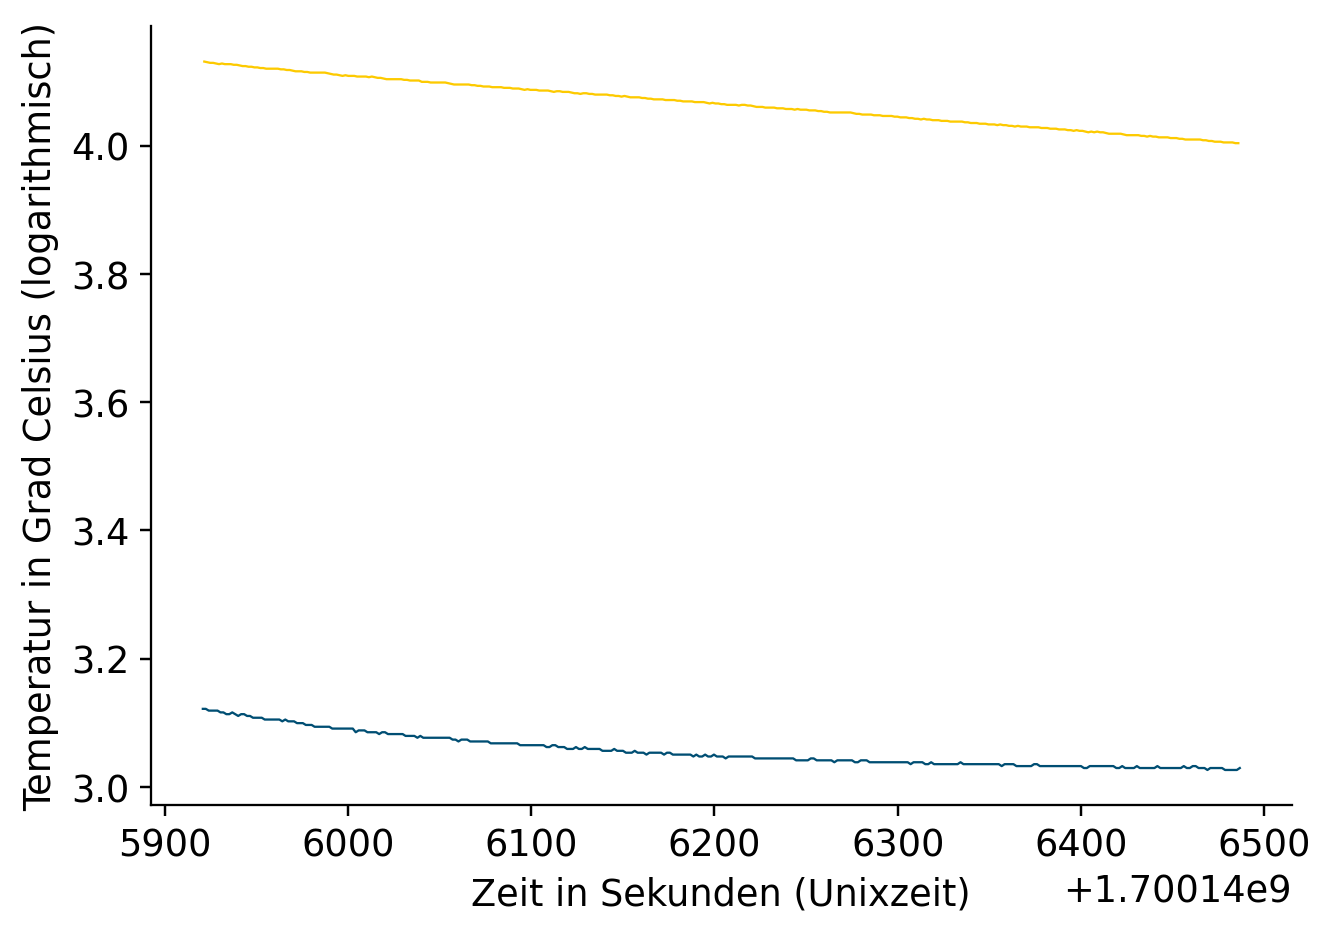

In [131]:
# TODO: Use the temperature and time data for plotting
# Temperatur über die Zeit aufgetragen, um das Temperaturgefälle erkennen zu können. 
#Leider war es hier für ich nicht möglich die Temperaturdifferent zu plotten, da ich den nötigen Befehl nicht herausfinden konnte.
fig = plt.figure()
plt.plot(time1,np.log(temp1))
plt.plot(time2,np.log(temp2))
plt.xlabel("Zeit in Sekunden (Unixzeit)")
plt.ylabel("Temperatur in Grad Celsius (logarithmisch)")
# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [132]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
# Die entsprechenden Temperaturen ausgelesen und im zweiten Schritt wie vorgeben verrechnet.
T_1 = temp2[0]
T_2 = temp2[-1]
p = np.polyfit(time2, temp2-T_2, 0)
# DONE #

#### (iV) Ergebnis

In [133]:
# TODO: Print result
# Ausgabe unseres Koeffizienten im Newtonschen Abkühlungsgesetz.
print(p)
# DONE #

[3.51788244]


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Der Versuch hat trotz der einfachen Versuchsumgebung gut funktioniert. Es hat sich ein meiner Meinung nach sinnvoller Koeffizient ergeben, welcher einen Zusammenhang zwischen Wärmeverlusten und dem Temperaturunterschied von einem Körper zur Umgebung beschreibt. Meiner Meinung nach konnte ich das Abkühlungsgesetz somit bestätigen. Allerdings ist mir bewusst, dass mein Messergebnis einigen Fehlern und äußeren Einflüssen, bedingt der Versuchsumgebung, unterliegt.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Meiner Meinung nach hat der Versuch gut funktioniert. Der Koeffizient beschreibt einen Zusammenhang zwischen den oben genannten Größen. In einem Laborversuch könnte man natürlich äußere Einflüsse besser einstellen und zu einem vermutlich genaueren Ergebnis gelangen. In meinen Augen ist mein Versuch jedoch nicht gescheitert. Lediglich im Bereich der Versuchsumgebung und eventuell qualitativ hochwertigeren Sensoren besteht noch ein Verbesserungspotential.